<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/news_daliy_category_prediction_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d crxxom/daily-google-news

  0% 0.00/5.27M [00:00<?, ?B/s]
100% 5.27M/5.27M [00:00<00:00, 83.4MB/s]


In [8]:
import zipfile
zip = zipfile.ZipFile("/content/daily-google-news.zip",'r')
zip.extractall("/content")
zip.close()

In [9]:
df=pd.read_csv('2023_9.csv')

In [10]:
df.shape

(51302, 5)

In [11]:
df.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


In [12]:
df.tail()

,Title,Publisher,DateTime,Link,Category
51297,Slovakia's Election Could Echo in Ukraine. Her...,The New York Times,2023-09-30T04:01:14Z,https://news.google.com/articles/CBMiU2h0dHBzO...,Worldwide
51298,Things to know about the Nobel Prizes - The Wa...,The Washington Post,2023-09-30T04:26:44Z,https://news.google.com/articles/CBMimQFodHRwc...,Worldwide
51299,"After brief calm, protests against killing of ...",Hindustan Times,2023-09-30T04:51:51Z,https://news.google.com/articles/CBMikgFodHRwc...,Worldwide
51300,‘No one is safe’: France vows action as bedbug...,CNN,2023-09-30T04:58:00Z,https://news.google.com/articles/CBMiTmh0dHBzO...,Worldwide
51301,Slovakia election: polls open in knife-edge vo...,The Guardian,2023-09-30T05:00:00Z,https://news.google.com/articles/CBMieWh0dHBzO...,Worldwide


In [13]:
df['Category'].unique()

array(['Business', 'Entertainment', 'Headlines', 'Health', 'Science',
       'Sports', 'Technology', 'Worldwide'], dtype=object)

In [14]:
df.isnull().sum()

Title        0
Publisher    0
DateTime     0
Link         0
Category     0
dtype: int64

In [15]:
y=df['Category']

In [16]:
y.unique()

array(['Business', 'Entertainment', 'Headlines', 'Health', 'Science',
       'Sports', 'Technology', 'Worldwide'], dtype=object)

In [17]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [18]:
le=LabelEncoder()
stc=StandardScaler()

In [19]:
y_scaled=le.fit_transform(y)

In [20]:
y_scaled

array([0, 0, 0, ..., 7, 7, 7])

In [21]:
### requires nltk libraries for text preprocessing
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import warnings

# Ignore a specific type of warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Download the necessary data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
## Only extracting the text
def extracted_text(text):
    words = re.findall('[A-Za-z]+', text)
    extracted = ' '.join([word.lower() for word in words])
    return extracted

In [23]:
df['Title']=df['Title'].apply(extracted_text)

In [24]:
corpus=[]
def preprocess(text):
    review = text.lower()
    review = review.split()
    ps=PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)

    return review

In [25]:
df['Title']=df['Title'].apply(preprocess)

In [26]:
X=df['Title']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer(max_features=2500,analyzer='word')

In [29]:
X_cv=cv.fit_transform(X).toarray()

In [30]:
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
cv.get_feature_names_out()

array(['aaron', 'abc', 'abl', ..., 'zone', 'zoo', 'zoom'], dtype=object)

In [32]:
pd.set_option("display.max_columns",None)

In [33]:
bow=pd.DataFrame(X_cv,columns=cv.get_feature_names_out())

In [34]:
bow.head()

aaron  abc  abl  abort  absolut  abus  acc  accept  access  accid  \
0      0    0    0      0        0     0    0       0       0      0   
1      0    0    0      0        0     0    0       0       0      0   
2      0    0    0      0        0     0    0       0       0      0   
3      0    0    0      0        0     0    0       0       0      0   
4      0    0    0      0        0     0    0       0       0      0   

   accident  accord  account  accus  achiev  across  act  action  activ  \
0         0       0        0      0       0       0    0       0      0   
1         0       0        0      0       0       0    0       0      0   
2         0       0        0      0       0       0    0       0      0   
3         0       0        0      0       0       0    0       0      0   
4         0       0        0      0       0       0    0       0      0   

   activis  activist  actor  actual  ad  adam  adapt  add  addit  address  \
0        0         0      0       0   0     0      0    0      0        0   
1        0         0      0       0   0     0      0    0      0        0   
2        0         0      0       0   0     0      0    0      0        0   
3        0         0      0       0   0     0      0    0      0        0   
4        0         0      0       0   0     0      0    0      0        0   

   aditya  administr  admit  adult  advanc  advic  advis  aew  affect  afford  \
0       0          0      0      0       0      0      0    0       0       0   
1       0          0      0      0       0      0      0    0       0       0   
2       0          0      0      0       0      0      0    0       0       0   
3       0          0      0      0       0      0      0    0       0       0   
4       0          0      0      0       0      0      0    0       0       0   

   afghanistan  africa  african  ag  age  agenc  agent  ago  agre  agreement  \
0            0       0        0   0    0      0      0    0     0          0   
1            0       0        0   0    0      0      0    0     0          0   
2            0       0        0   0    0      0      0    0     0          0   
3            0       0        0   0    0      0      0    0     0          0   
4            0       0        0   0    0      0      0    0     0          0   

   ahead  ahsoka  ai  aid  aim  air  airbnb  aircraft  airlin  airpod  \
0      0       0   0    0    0    0       0         0       0       0   
1      0       0   0    0    0    0       0         0       0       0   
2      0       0   0    0    0    0       0         0       0       0   
3      0       0   0    0    0    0       0         0       0       0   
4      0       0   0    0    0    0       0         0       0       0   

   airport  al  alabama  alarm  album  alert  alex  alexa  alien  alleg  \
0        0   0        0      0      0      0     0      0      0      0   
1        0   0        0      0      0      0     0      0      0      0   
2        0   0        0      0      0      0     0      0      0      0   
3        0   0        0      0      0      0     0      0      0      0   
4        0   0        0      0      0      0     0      0      0      0   

   allegedli  allen  alli  allianc  allow  almost  along  alreadi  also  \
0          0      0     0        0      0       0      0        0     0   
1          0      0     0        0      0       0      0        0     0   
2          0      0     0        0      0       0      0        0     0   
3          0      0     0        0      0       0      0        0     0   
4          0      0     0        0      0       0      0        0     0   

   altern  alway  alzheim  amaz  amazon  ambassador  amd  america  american  \
0       0      0        0     0       0           0    0        0         0   
1       0      0        0     0       0           0    0        0         0   
2       0      0        0     0       0           0    0        0         0   
3       0      0        0     0

In [35]:
bow.tail()

aaron  abc  abl  abort  absolut  abus  acc  accept  access  accid  \
51297      0    0    0      0        0     0    0       0       0      0   
51298      0    0    0      0        0     0    0       0       0      0   
51299      0    0    0      0        0     0    0       0       0      0   
51300      0    0    0      0        0     0    0       0       0      0   
51301      0    0    0      0        0     0    0       0       0      0   

       accident  accord  account  accus  achiev  across  act  action  activ  \
51297         0       0        0      0       0       0    0       0      0   
51298         0       0        0      0       0       0    0       0      0   
51299         0       0        0      0       0       0    0       0      0   
51300         0       0        0      0       0       0    0       1      0   
51301         0       0        0      0       0       0    0       0      0   

       activis  activist  actor  actual  ad  adam  adapt  add  addit  address  \
51297        0         0      0       0   0     0      0    0      0        0   
51298        0         0      0       0   0     0      0    0      0        0   
51299        0         0      0       0   0     0      0    0      0        0   
51300        0         0      0       0   0     0      0    0      0        0   
51301        0         0      0       0   0     0      0    0      0        0   

       aditya  administr  admit  adult  advanc  advic  advis  aew  affect  \
51297       0          0      0      0       0      0      0    0       0   
51298       0          0      0      0       0      0      0    0       0   
51299       0          0      0      0       0      0      0    0       0   
51300       0          0      0      0       0      0      0    0       0   
51301       0          0      0      0       0      0      0    0       0   

       afford  afghanistan  africa  african  ag  age  agenc  agent  ago  agre  \
51297       0            0       0        0   0    0      0      0    0     0   
51298       0            0       0        0   0    0      0      0    0     0   
51299       0            0       0        0   0    0      0      0    0     0   
51300       0            0       0        0   0    0      0      0    0     0   
51301       0            0       0        0   0    0      0      0    0     0   

       agreement  ahead  ahsoka  ai  aid  aim  air  airbnb  aircraft  airlin  \
51297          0      0       0   0    0    0    0       0         0       0   
51298          0      0       0   0    0    0    0       0         0       0   
51299          0      0       0   0    0    0    0       0         0       0   
51300          0      0       0   0    0    0    0       0         0       0   
51301          0      0       0   0    0    0    0       0         0       0   

       airpod  airport  al  alabama  alarm  album  alert  alex  alexa  alien  \
51297       0        0   0        0      0      0      0     0      0      0   
51298       0        0   0        0      0      0      0     0      0      0   
51299       0        0   0        0      0      0      0     0      0      0   
51300       0        0   0        0      0      0      0     0      0      0   
51301       0        0   0        0      0      0      0     0      0      0   

       alleg  allegedli  allen  alli  allianc  allow  almost  along  alreadi  \
51297      0          0      0     0        0      0       0      0        0   
51298      0          0      0     0        0      0       0      0        0   
51299      0          0      0     0        0      0       0      0        0   
51300      0          0      0     0        0      0       0      0        0   
51301      0          0      0     0        0      0       0      0        0   

       also  altern  alway  alzheim  amaz  amazon  ambassador  amd  america  \
51297     0       0      0        0     0       0           0    0        0   
51298     0       0      0        0  

In [36]:
X_scaled=stc.fit_transform(X_cv)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.33,random_state=42)

In [39]:
X_train

array([[-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       ...,
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394]])

## 1. Logistic Regression

In [40]:
lgst=LogisticRegression()

In [41]:
lgst.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred_lgst=lgst.predict(X_test)

In [43]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_lgst))

Score on test data:-  0.7562315416420555


In [44]:
print("Score on train data:- ",lgst.score(X_train,y_train))

Score on train data:-  0.9391946933550565


In [45]:
print(classification_report(y_test,y_pred_lgst))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2317
           1       0.79      0.80      0.80      2307
           2       0.57      0.56      0.57      2373
           3       0.80      0.84      0.82      1547
           4       0.82      0.82      0.82      1441
           5       0.87      0.84      0.85      2571
           6       0.83      0.86      0.84      2212
           7       0.64      0.66      0.65      2162

    accuracy                           0.76     16930
   macro avg       0.76      0.76      0.76     16930
weighted avg       0.76      0.76      0.76     16930



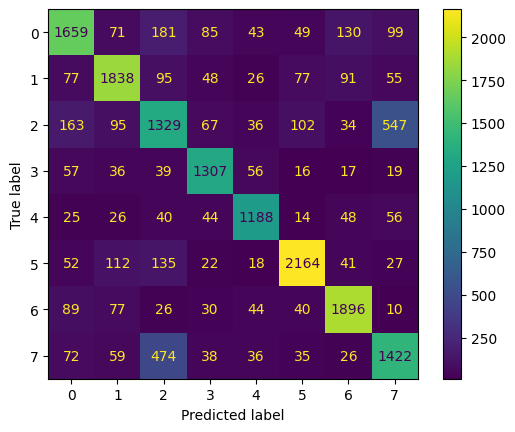

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgst)).plot()

## 2. Decision Tree Classifier

In [47]:
dtc=DecisionTreeClassifier()

In [48]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dtc=dtc.predict(X_test)

In [50]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_dtc))

Score on test data:-  0.7351447135262847


In [51]:
print("Score on training data:- ",dtc.score(X_train,y_train))

Score on training data:-  0.9759397183754218


In [52]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      2317
           1       0.76      0.78      0.77      2307
           2       0.56      0.56      0.56      2373
           3       0.80      0.83      0.82      1547
           4       0.82      0.85      0.83      1441
           5       0.78      0.83      0.81      2571
           6       0.84      0.83      0.83      2212
           7       0.61      0.55      0.58      2162

    accuracy                           0.74     16930
   macro avg       0.74      0.74      0.74     16930
weighted avg       0.73      0.74      0.73     16930



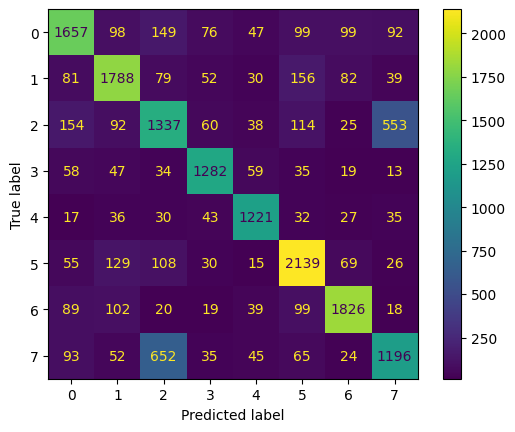

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

## 3. Random Forest Classifier

In [54]:
rfc=RandomForestClassifier()

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_rfc=rfc.predict(X_test)

In [57]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_rfc))

Score on test data:-  0.7854695806261075


In [58]:
print("Score on training data:- ",rfc.score(X_train,y_train))

Score on training data:-  0.9759397183754218


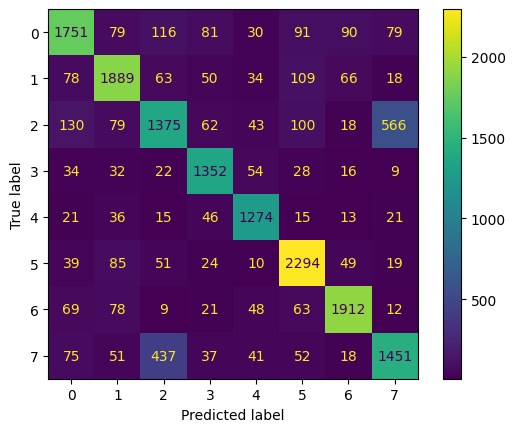

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

## 4. Bagging with Logistic Regression

In [60]:
bgg_lg=BaggingClassifier(estimator=lgst)

In [61]:
bgg_lg.fit(X_train,y_train)

BaggingClassifier(estimator=LogisticRegression())

In [62]:
y_pred_bgg=bgg_lg.predict(X_test)

In [63]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_bgg))

Score on test data:-  0.7760189013585351


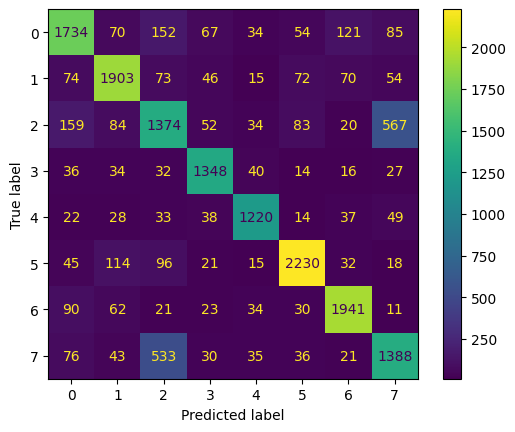

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

## 5. Implemention of ANN

In [65]:
from tensorflow import keras
from tensorflow.keras.layers import Dense , SimpleRNN,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,SpatialDropout1D
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [66]:
print(y_scaled)

[0 0 0 ... 7 7 7]


In [67]:
dummy_y = to_categorical(y_scaled)

In [68]:
print(dummy_y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [69]:
X_train.shape

(34372, 2500)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,dummy_y,test_size=0.33,random_state=42)

In [71]:
model = Sequential()
model.add(keras.layers.Input(2500,None))
model.add(Dense(228, activation='relu'))
model.add(Dense(114, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 228)               570228    
                                                                 
 dense_1 (Dense)             (None, 114)               26106     
                                                                 
 dense_2 (Dense)             (None, 60)                6900      
                                                                 
 dense_3 (Dense)             (None, 8)                 488       
                                                                 
Total params: 603722 (2.30 MB)
Trainable params: 603722 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [74]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20,
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 5s 9ms/step - loss: 0.8034 - accuracy: 0.7297 - val_loss: 0.5576 - val_accuracy: 0.8147
Epoch 2/20
538/538 [==============================] - 6s 11ms/step - loss: 0.3242 - accuracy: 0.8869 - val_loss: 0.5842 - val_accuracy: 0.8083
Epoch 3/20
538/538 [==============================] - 5s 9ms/step - loss: 0.2033 - accuracy: 0.9247 - val_loss: 0.6679 - val_accuracy: 0.7989
Epoch 4/20
538/538 [==============================] - 5s 10ms/step - loss: 0.1505 - accuracy: 0.9435 - val_loss: 0.7252 - val_accuracy: 0.8096
Epoch 5/20
538/538 [==============================] - 5s 10ms/step - loss: 0.1247 - accuracy: 0.9507 - val_loss: 0.7740 - val_accuracy: 0.8046
Epoch 6/20
538/538 [==============================] - 4s 8ms/step - loss: 0.1203 - accuracy: 0.9526 - val_loss: 0.8588 - val_accuracy: 0.7920
Epoch 7/20
538/538 [==============================] - 5s 9ms/step - loss: 0.1160 - accuracy: 0.9517 - val_loss: 0.9143 - val_accuracy: 0.7981
Epo

In [75]:
loss,accuracy=model.evaluate(X_test,y_test)

530/530 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.8147


In [76]:
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

Loss:-  0.5576202273368835
Accuracy:-  0.8147076368331909


In [77]:
model2 = keras.Sequential()

# Input layer
model2.add(keras.layers.Input(shape=(2500,)))

# Hidden layers
model2.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())

# Output layer
model2.add(Dense(8, activation='softmax'))

In [78]:
# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1280512   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_2 (Bat  (None, 128)              

In [80]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history2 = model2.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 13s 20ms/step - loss: 0.8975 - accuracy: 0.7025 - val_loss: 0.5744 - val_accuracy: 0.8128
Epoch 2/20
538/538 [==============================] - 10s 19ms/step - loss: 0.3512 - accuracy: 0.8785 - val_loss: 0.5869 - val_accuracy: 0.8048
Epoch 3/20
538/538 [==============================] - 11s 21ms/step - loss: 0.2362 - accuracy: 0.9150 - val_loss: 0.6550 - val_accuracy: 0.7979
Epoch 4/20
538/538 [==============================] - 10s 19ms/step - loss: 0.1980 - accuracy: 0.9259 - val_loss: 0.6808 - val_accuracy: 0.8059
Epoch 5/20
538/538 [==============================] - 10s 19ms/step - loss: 0.1732 - accuracy: 0.9339 - val_loss: 0.7156 - val_accuracy: 0.8004
Epoch 6/20
538/538 [==============================] - 10s 20ms/step - loss: 0.1478 - accuracy: 0.9424 - val_loss: 0.7621 - val_accuracy: 0.8014
Epoch 7/20
538/538 [==============================] - 10s 19ms/step - loss: 0.1393 - accuracy: 0.9424 - val_loss: 0.7830 - val_accuracy:

In [81]:
loss,accuracy=model2.evaluate(X_test,y_test)
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

530/530 [==============================] - 2s 4ms/step - loss: 0.5744 - accuracy: 0.8128
Loss:-  0.5743778944015503
Accuracy:-  0.8127584457397461


In [82]:
model3 = keras.Sequential()

# Input layer
model3.add(keras.layers.Input(shape=(2500,)))
# Hidden layers
model3.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))
# Output layer
model3.add(Dense(8, activation='softmax'))

In [83]:
# Compile the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1280512   
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [85]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history3 = model3.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 13s 20ms/step - loss: 2.3986 - accuracy: 0.1662 - val_loss: 1.8253 - val_accuracy: 0.3613
Epoch 2/20
538/538 [==============================] - 11s 20ms/step - loss: 1.6083 - accuracy: 0.3983 - val_loss: 0.8834 - val_accuracy: 0.6975
Epoch 3/20
538/538 [==============================] - 11s 20ms/step - loss: 1.0425 - accuracy: 0.6305 - val_loss: 0.6727 - val_accuracy: 0.7559
Epoch 4/20
538/538 [==============================] - 11s 20ms/step - loss: 0.8228 - accuracy: 0.7164 - val_loss: 0.6183 - val_accuracy: 0.7791
Epoch 5/20
538/538 [==============================] - 11s 20ms/step - loss: 0.7015 - accuracy: 0.7657 - val_loss: 0.5879 - val_accuracy: 0.8110
Epoch 6/20
538/538 [==============================] - 11s 20ms/step - loss: 0.6229 - accuracy: 0.7990 - val_loss: 0.5750 - val_accuracy: 0.8204
Epoch 7/20
538/538 [==============================] - 12s 22ms/step - loss: 0.5662 - accuracy: 0.8192 - val_loss: 0.5688 - val_accuracy:

In [86]:
loss,accuracy=model3.evaluate(X_test,y_test)
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

530/530 [==============================] - 2s 4ms/step - loss: 0.5672 - accuracy: 0.8272
Loss:-  0.5671780109405518
Accuracy:-  0.827170729637146
